# Analisis exploratorio de los datos preprocesados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

## I. Cargar datos

In [2]:
file_path = 'data/processed/data_sureste.csv'
df=pd.read_csv(file_path)

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

df.head()

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,Zona
date,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,3.02,NaN,NaN,NaN,9.0,111.86,79.19,NaN,NaN,75.0,6.3,0.000,NaN,6.6,NaN,SURESTE
2021-01-01 01:00:00,2.94,NaN,NaN,NaN,13.0,111.03,81.46,NaN,0.0,77.0,6.5,0.007,NaN,14.2,NaN,SURESTE
2021-01-01 02:00:00,2.94,NaN,NaN,NaN,12.0,68.70,48.07,NaN,0.0,80.0,6.3,0.007,5.96,11.5,NaN,SURESTE
2021-01-01 03:00:00,2.97,NaN,NaN,NaN,11.0,63.77,43.35,NaN,0.0,82.0,6.2,0.007,5.38,6.6,NaN,SURESTE
2021-01-01 04:00:00,3.00,NaN,NaN,NaN,11.0,72.11,45.47,NaN,0.0,83.0,6.3,0.007,4.95,7.5,NaN,SURESTE


In [3]:
df.shape

(39401, 16)

Diccionario de Variables (Basado en data_limpios.csv): Es vital clasificar las variables por su naturaleza física y estadística. Basado en tu archivo, sugiero esta estructura:

Variable Temporal: date (Debe ser convertida a objeto datetime). Es el índice de tu serie de tiempo.

Variables Categóricas (Nominales): Zona (ej. CENTRO, NORTE). Esta es crucial para segmentar el análisis espacial.

Variables Numéricas (Continuas) - Contaminantes: CO, NO, NO2, NOX, O3, PM10, PM2.5, SO2.

Variables Numéricas (Continuas) - Meteorológicas:

PRS (Presión): Importante para la estabilidad atmosférica.

RAINF (Lluvia): Generalmente tiene muchos ceros (distribución inflada en ceros).

RH (Humedad Relativa): Afecta la formación de aerosoles secundarios.

SR (Radiación Solar): Motor de reacciones fotoquímicas (Ozono).

TOUT (Temperatura): Correlacionada con O3.

WSR (Velocidad del Viento) y WDR (Dirección del Viento): Claves para la dispersión.

Primero se identificarán los datos nulos con el objetivo de facilitar la elección del método de imputación de datos. 

## II. Medidas Estadísticas (Variables Cuantitativas)

In [4]:
cols_numericas = df.select_dtypes(include=[np.number]).columns
estadisticos = df[cols_numericas].describe().T
estadisticos

,count,mean,std,min,25%,50%,75%,max
CO,35918.0,1.484322,0.858836,0.00,0.82,1.360,2.0500,37.000
NO,35654.0,9.745204,14.920886,0.50,2.90,4.100,8.6000,210.000
NO2,36889.0,13.446504,9.857438,0.80,6.10,10.400,18.1000,81.800
NOX,36892.0,22.860826,21.866547,1.30,9.40,14.600,27.6000,239.400
O3,38055.0,27.768756,18.479036,1.00,14.00,25.000,38.0000,163.000
PM10,38157.0,52.024246,34.579853,2.00,30.00,45.000,66.0000,800.000
PM2.5,33904.0,18.134360,11.599890,2.00,10.00,15.430,23.3100,214.260
PRS,38216.0,722.723639,4.098266,682.90,720.20,722.400,725.0000,740.000
RAINF,38816.0,0.124899,1.430425,0.00,0.00,0.000,0.0000,17.990
RH,38693.0,59.403820,20.944213,1.00,43.00,61.000,77.0000,97.000


In [5]:
estadisticos['mediana'] = df[cols_numericas].median()
estadisticos['sesgo'] = df[cols_numericas].skew()

estadisticos['mediana']

CO         1.360
NO         4.100
NO2       10.400
NOX       14.600
O3        25.000
PM10      45.000
PM2.5     15.430
PRS      722.400
RAINF      0.000
RH        61.000
SO2        3.500
SR         0.007
TOUT      24.060
WSR        9.300
WDR      107.000
Name: mediana, dtype: float64

## III. Visualización y Distribución
*Histogramas (Análisis de Distribución):
*Boxplots (Diagramas de Caja):
*Mapa de Calor (Correlación de Pearson/Spearman):

In [6]:
sns.set_theme(style="whitegrid")

/var/folders/0p/t_nmy1zs1jgc_z9_lggdxk7m0000gn/T/ipykernel_38109/304494504.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Zona', y=var, data=df, palette="Set3")
/var/folders/0p/t_nmy1zs1jgc_z9_lggdxk7m0000gn/T/ipykernel_38109/304494504.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Zona', y=var, data=df, palette="Set3")
/var/folders/0p/t_nmy1zs1jgc_z9_lggdxk7m0000gn/T/ipykernel_38109/304494504.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Zona', y=var, data=df, palette="Set3")
/var/folders/0p/t_nmy1zs1jgc_z9_lggdxk7m

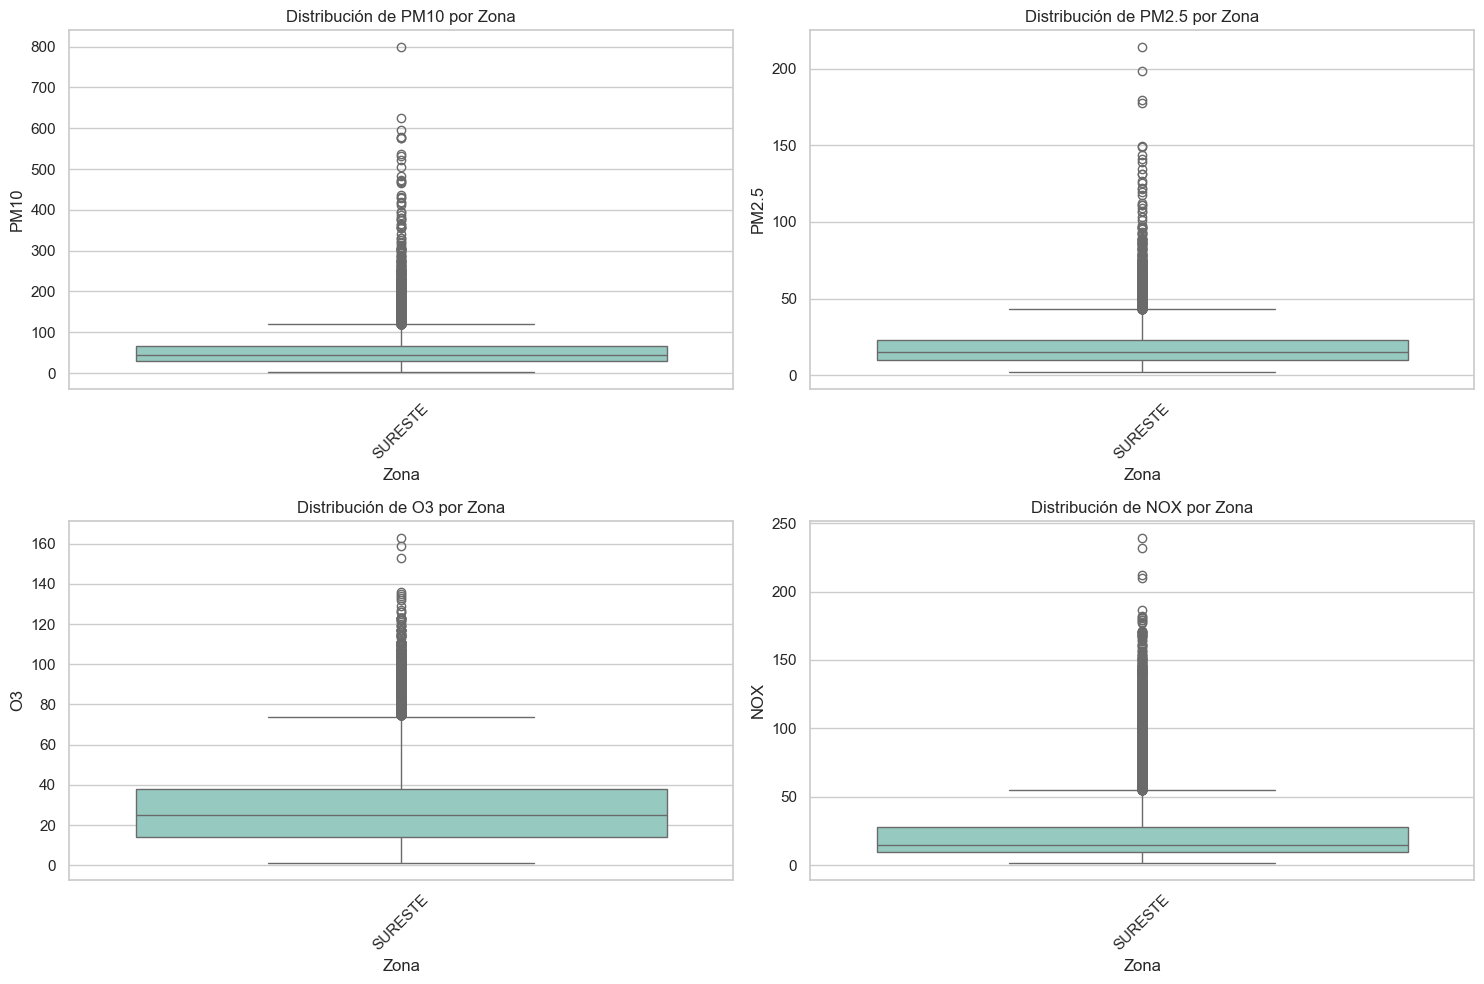

In [7]:
# Contaminantes por Zona
# Esto responde: ¿Qué zona es la más contaminada y cuál tiene más picos extremos?
vars_interes = ['PM10', 'PM2.5', 'O3', 'NOX'] # Puedes agregar más

plt.figure(figsize=(15, 10))
for i, var in enumerate(vars_interes):
    plt.subplot(2, 2, i+1)
    # Ordenamos por mediana para mejor visualización
    sns.boxplot(x='Zona', y=var, data=df, palette="Set3")
    plt.title(f'Distribución de {var} por Zona')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

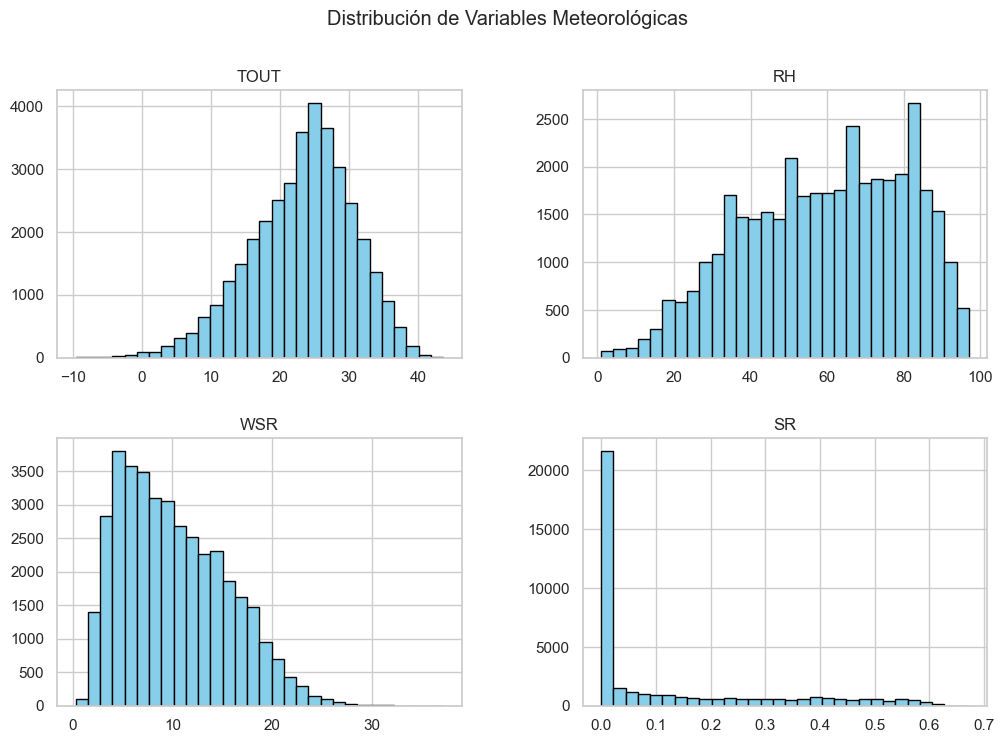

In [8]:
# 2. Histogramas de Variables Meteorológicas
# Esto responde: ¿Cómo se comportan el clima y el viento?
vars_meteo = ['TOUT', 'RH', 'WSR', 'SR']

df[vars_meteo].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables Meteorológicas')
plt.show()

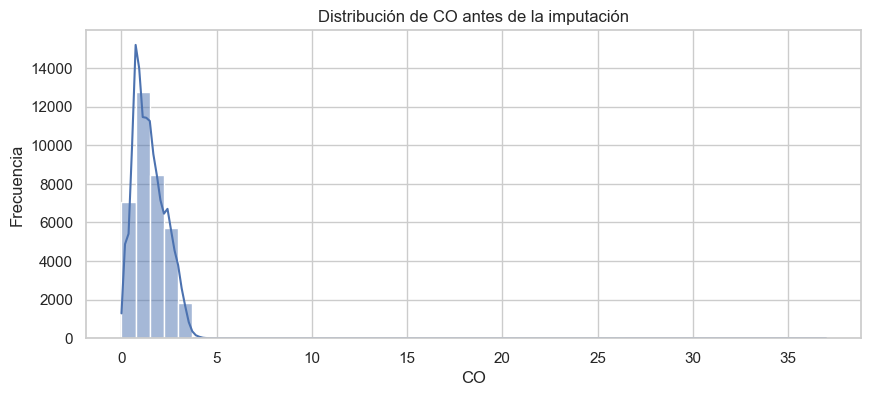

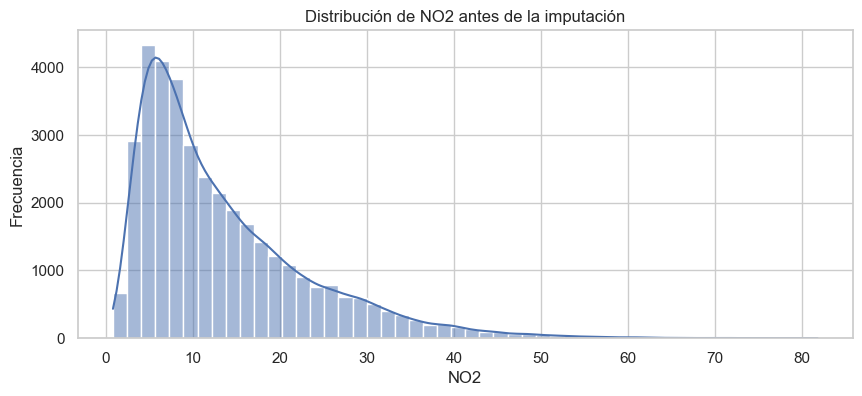

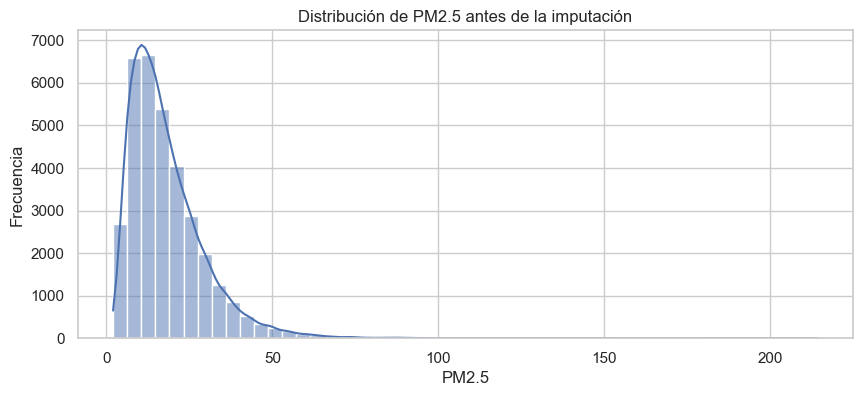

In [9]:
cols=['CO', 'NO2','PM2.5']

for col in cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col].dropna(), bins=50, kde=True)
    plt.title(f'Distribución de {col} antes de la imputación')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()  

## IV. Calidad de los datos

### Deteccion de nulos

In [10]:
def obtener_longitud_brechas(columna_temporal: pd.Series) -> pd.Series:
    """
    Identifica todas las brechas (gaps) de datos faltantes y devuelve
    una Serie que contiene la longitud de cada brecha.
    El output es la data cruda para un histograma.

    Argumentos:
      columna_temporal: Una pd.Series (ej. df['O3']) con un índice.

    Devuelve:
      pd.Series: "Datos para graficar". 
                 Cada valor en la Serie es la longitud de una brecha 
                 de nulos.
    """
    es_nulo = columna_temporal.isnull()
    
    #primero se crea un ID de grupo para cada bloque consecutivo de nulos o no-nulos
    # .diff() detecta el cambio de False a True
    # .ne(0) marca esos cambios
    # .cumsum() asigna un ID único a cada bloque
    group_id = es_nulo.astype(int).diff().ne(0).cumsum()
    
    #filtrar para quedarnos solo con los grupos que SÍ son nulos
    brechas_grupos = group_id[es_nulo]
    
    #contar el tamaño (longitud) de cada grupo (brecha)
    #esto devuelve una Serie donde el índice es el 'group_id' y el valor es su longitud
    longitud_de_cada_brecha = brechas_grupos.value_counts()
    
    #nombrar la Serie para claridad
    longitud_de_cada_brecha.name = "longitud_de_brecha"
    
    #el output es una Serie que lista todas las longitudes
    return longitud_de_cada_brecha

In [11]:
def porcentaje_nulos_por_anio(df_temporal: pd.DataFrame) -> pd.DataFrame:
    """
    Calcula el porcentaje de datos faltantes para cada columna,
    agrupado por año.

    Argumentos:
      df_temporal: pd.DataFrame con un pd.DatetimeIndex.

    Devuelve:
      pd.DataFrame: "Datos para graficar".
                    Índice = Año
                    Columnas = Variables del DataFrame original
                    Valores = Porcentaje de nulos (0-100)
    """
    if not isinstance(df_temporal.index, pd.DatetimeIndex):
        raise ValueError("El DataFrame de entrada debe tener un pd.DatetimeIndex.")

    #agrupar por el atributo year del índice temporal
    grupos_anuales = df_temporal.groupby(df_temporal.index.year)

    #calcular el % de nulos para cada grupo (año)
    # .apply() itera sobre cada grupo
    # df_anio.isnull().sum() cuenta nulos por columna
    # len(df_anio) es el total de registros en ese año
    porcentaje_nulos = grupos_anuales.apply(
        lambda df_anio: (df_anio.isnull().sum() / len(df_anio)) * 100
    )

    porcentaje_nulos.index.name = "Año"
    return porcentaje_nulos

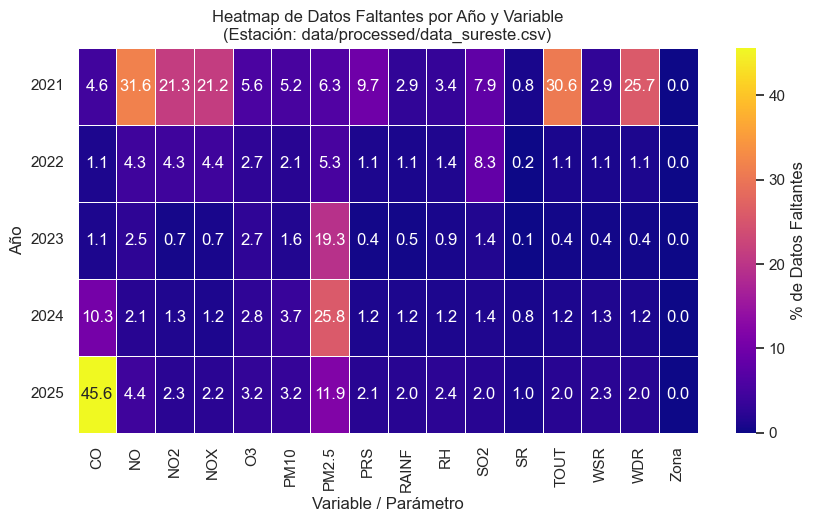

In [12]:
datos_heatmap = porcentaje_nulos_por_anio(df)
plt.figure(figsize=(10, 5)) 
    
sns.heatmap(
        datos_heatmap,
        annot=True,      
        fmt=".1f",      
        cmap='plasma',  
        linewidths=.5,
        cbar_kws={'label': '% de Datos Faltantes'} 
    )
    
plt.title(f'Heatmap de Datos Faltantes por Año y Variable\n(Estación: {file_path})')
plt.ylabel('Año')
plt.xlabel('Variable / Parámetro')
plt.yticks(rotation=0) 
plt.show()

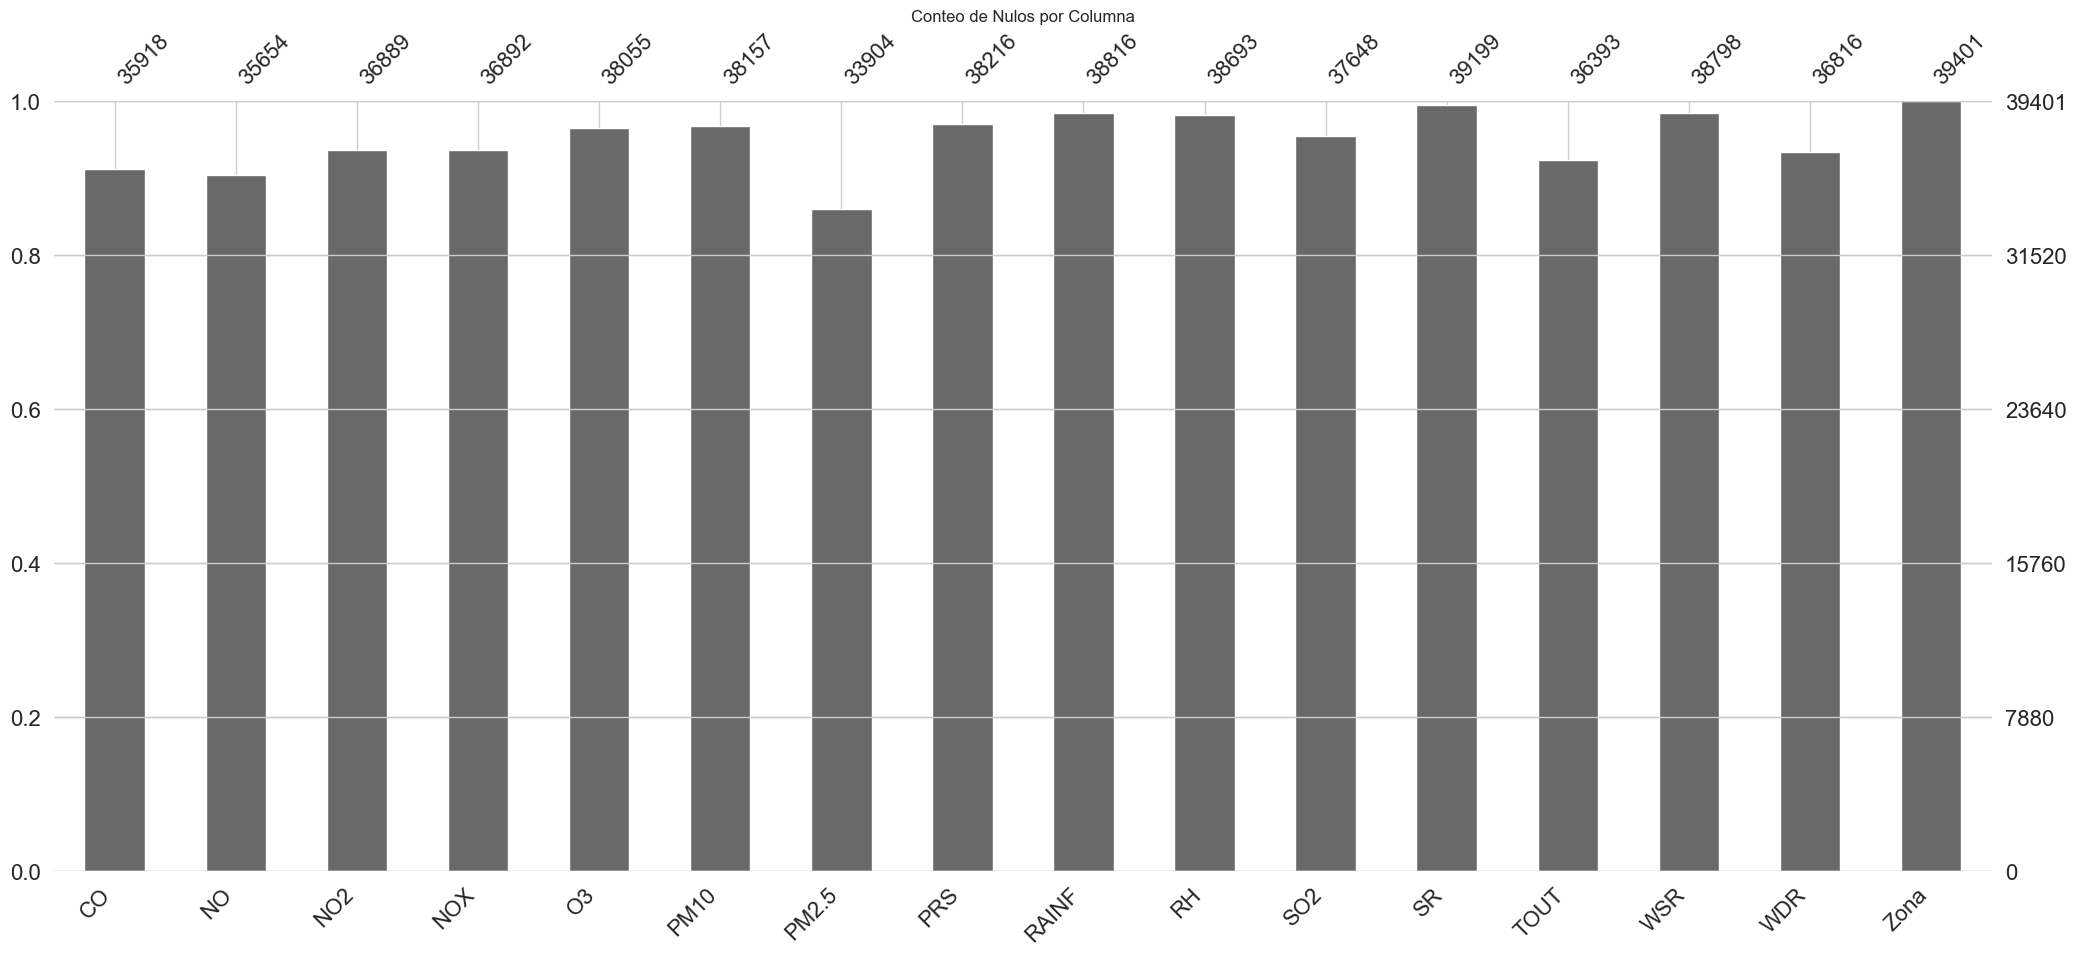

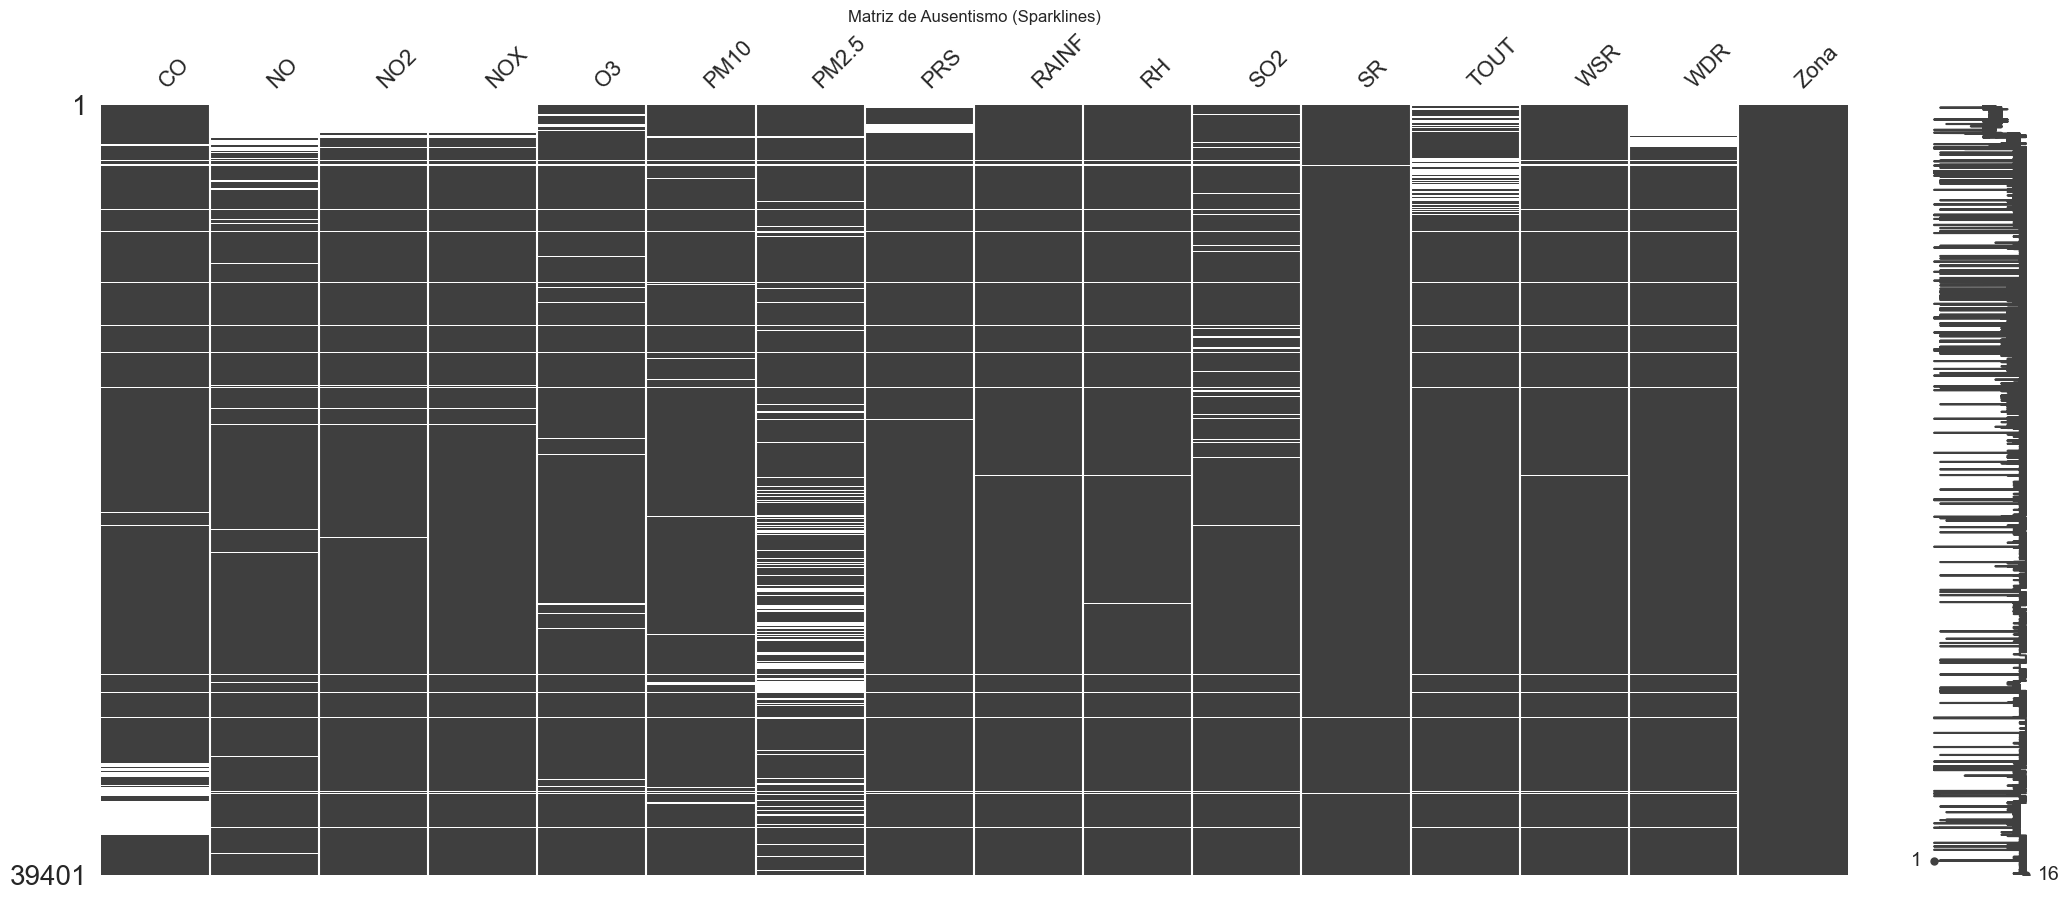

In [13]:
msno.bar(df)
plt.title('Conteo de Nulos por Columna')
plt.show()
msno.matrix(df)
plt.title('Matriz de Ausentismo (Sparklines)')
plt.show()

Datos para el histograma:
count     230.000000
mean       15.143478
std       110.600668
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      1656.000000
Name: longitud_de_brecha, dtype: float64


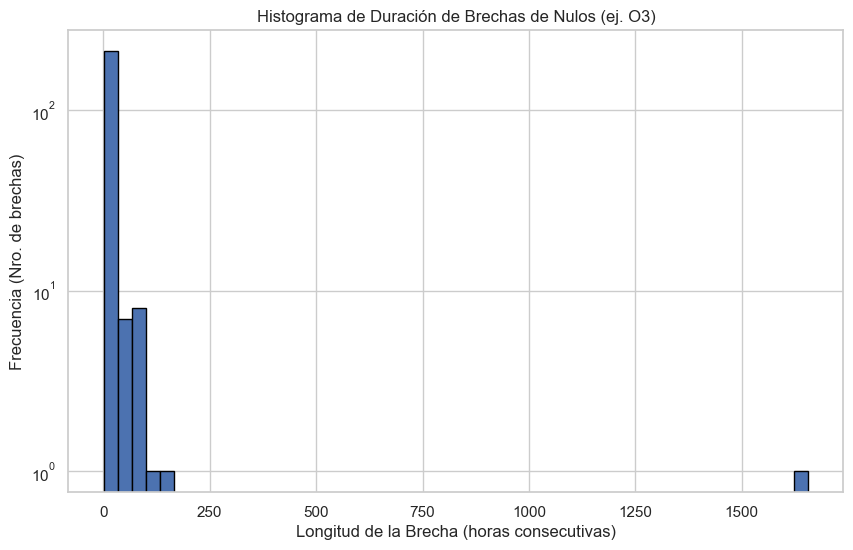

In [14]:
no_series = df['CO']
datos_hist = obtener_longitud_brechas(no_series)
print("Datos para el histograma:")
print(datos_hist.describe())
#
import matplotlib.pyplot as plt
#
plt.figure(figsize=(10, 6))
datos_hist.plot(kind='hist', 
                 bins=50, 
                 title='Histograma de Duración de Brechas de Nulos (ej. O3)',
                 edgecolor='black')
plt.xlabel('Longitud de la Brecha (horas consecutivas)')
plt.ylabel('Frecuencia (Nro. de brechas)')
plt.yscale('log') 
plt.show()

# En proceso...

Datos filtrados. 744 registros encontrados para Mayo 2025.


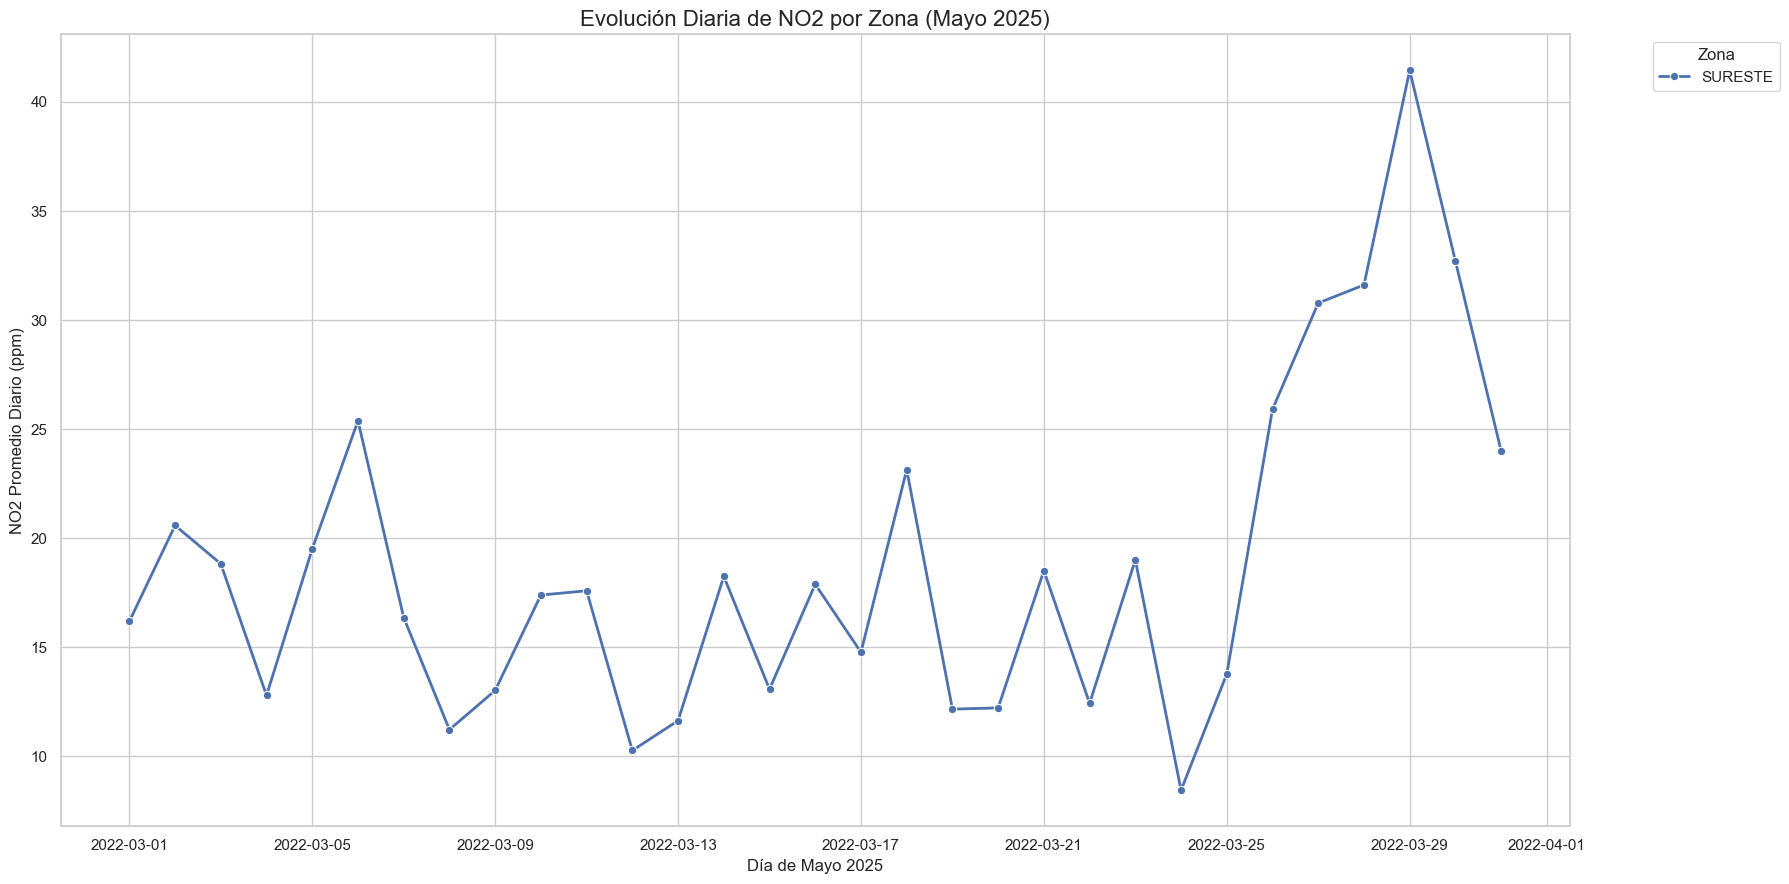

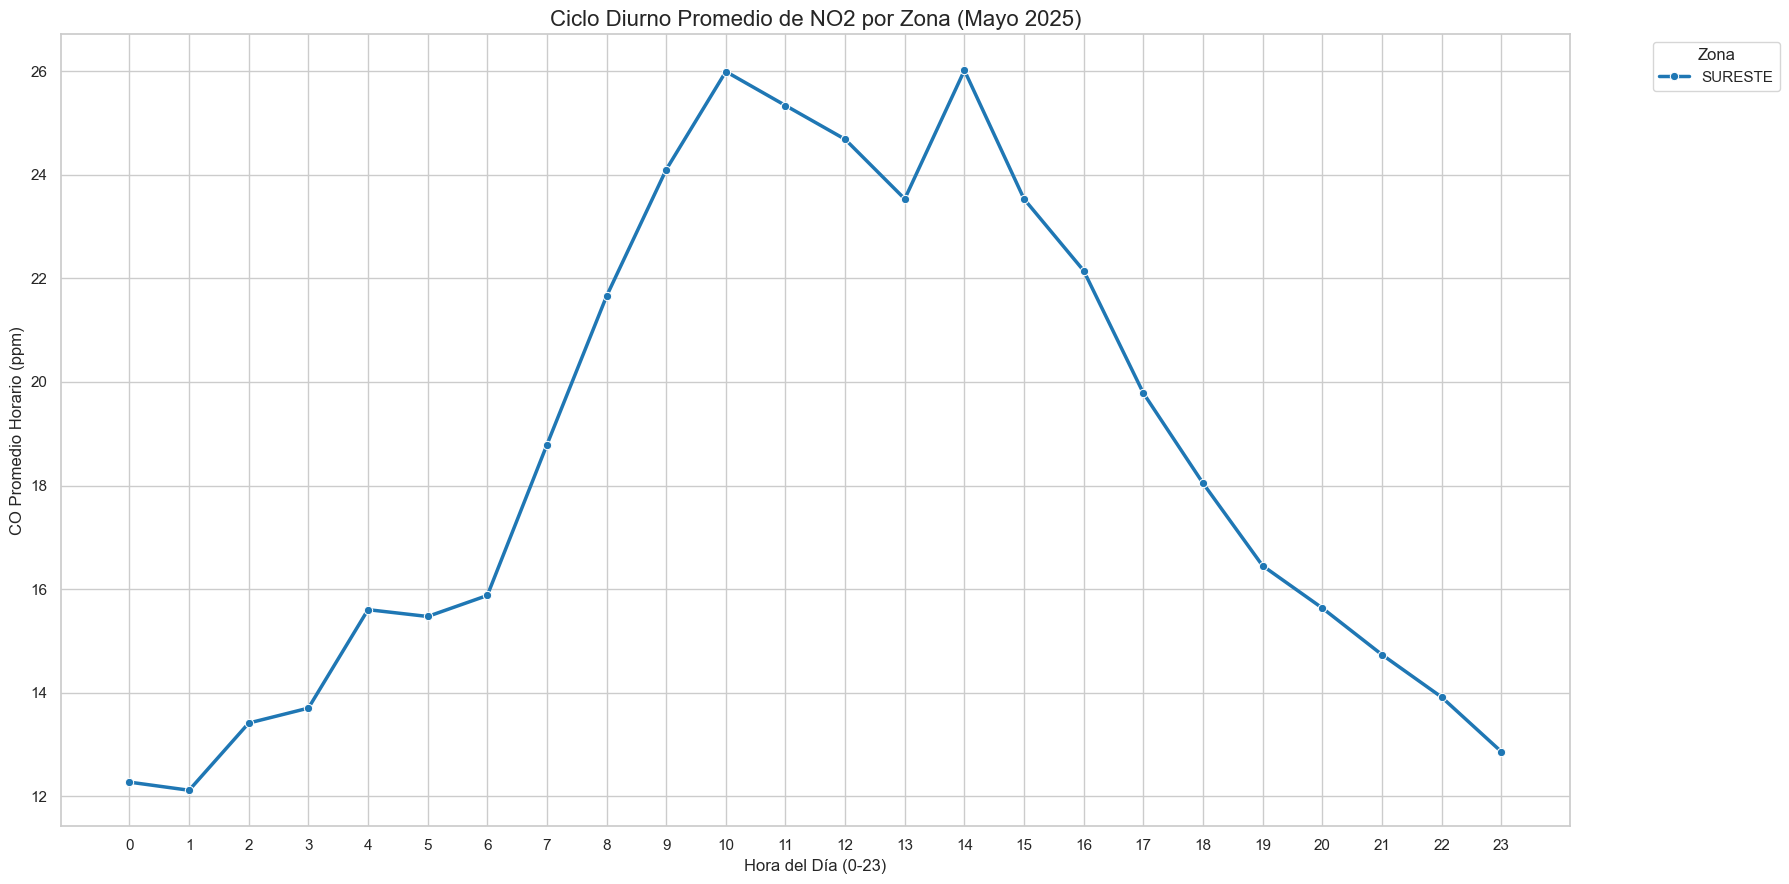

In [15]:
#ordnar df
df.sort_index(inplace=True)

#Filtrar el DataFrame para el rango de fechas (Mayo 2025)
df_mayo_2025 = df.loc['2022-03-01':'2022-03-31'].copy()

if df_mayo_2025.empty:
    print("Advertencia: No se encontraron datos para Mayo de 2025.")
else:
    print(f"Datos filtrados. {df_mayo_2025.shape[0]} registros encontrados para Mayo 2025.")


if not df_mayo_2025.empty:
    plt.figure(figsize=(18, 9))
    
    daily_co = df_mayo_2025.groupby('Zona')['PM2.5'].resample('D').mean().reset_index()

    sns.lineplot(
        data=daily_co, 
        x='date', 
        y='PM2.5', 
        hue='Zona',
        style='Zona',
        markers=True,
        linewidth=2
    )
    
    plt.title('Evolución Diaria de NO2 por Zona (Mayo 2025)', fontsize=16)
    plt.xlabel('Día de Mayo 2025')
    plt.ylabel('NO2 Promedio Diario (ppm)')
    plt.legend(title='Zona', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, which='both')
    plt.tight_layout()
    plt.show()

else:
    print("No se puede graficar (Diario): No hay datos para Mayo de 2025.")

#PATRÓN DE CICLO DIURNO (Promedio Horario)
if not df_mayo_2025.empty:
    plt.figure(figsize=(18, 9))
    
    #columna 'Hora' para agrupar
    df_mayo_2025['Hora'] = df_mayo_2025.index.hour
    
    #Agrupar por Zona y Hora, luego calcular la media de CO
    diurnal_cycle = df_mayo_2025.groupby(['Zona', 'Hora'])['PM2.5'].mean().reset_index()

    sns.lineplot(
        data=diurnal_cycle,
        x='Hora',
        y='PM2.5',
        hue='Zona',
        style='Zona',
        markers=True,
        linewidth=2.5,
        palette='tab10'
    )
    
    plt.title('Ciclo Diurno Promedio de NO2 por Zona (Mayo 2025)', fontsize=16)
    plt.xlabel('Hora del Día (0-23)')
    plt.ylabel('CO Promedio Horario (ppm)')
    plt.legend(title='Zona', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(0, 24))
    plt.grid(True, which='both')
    plt.tight_layout()
    plt.show()

else:
    print("No se puede graficar (Ciclo Diurno): No hay datos.")

Calculando la matriz de correlación...
Generando el heatmap...

--- Hallazgos Clave de Correlación ---

Correlaciones más fuertes con O3:
O3      1.000000
SR      0.556217
TOUT    0.494096
WSR     0.471407
PM10    0.238054
Name: O3, dtype: float64

Correlaciones más fuertes con PM2.5:
PM2.5    1.000000
PM10     0.652964
NO2      0.376937
NOX      0.365177
NO       0.296297
Name: PM2.5, dtype: float64

Correlaciones (Negativas) más fuertes con PM2.5 (Dispersión):
PRS     -0.133630
WSR     -0.076863
RAINF   -0.059148
TOUT    -0.002845
RH      -0.001364
Name: PM2.5, dtype: float64


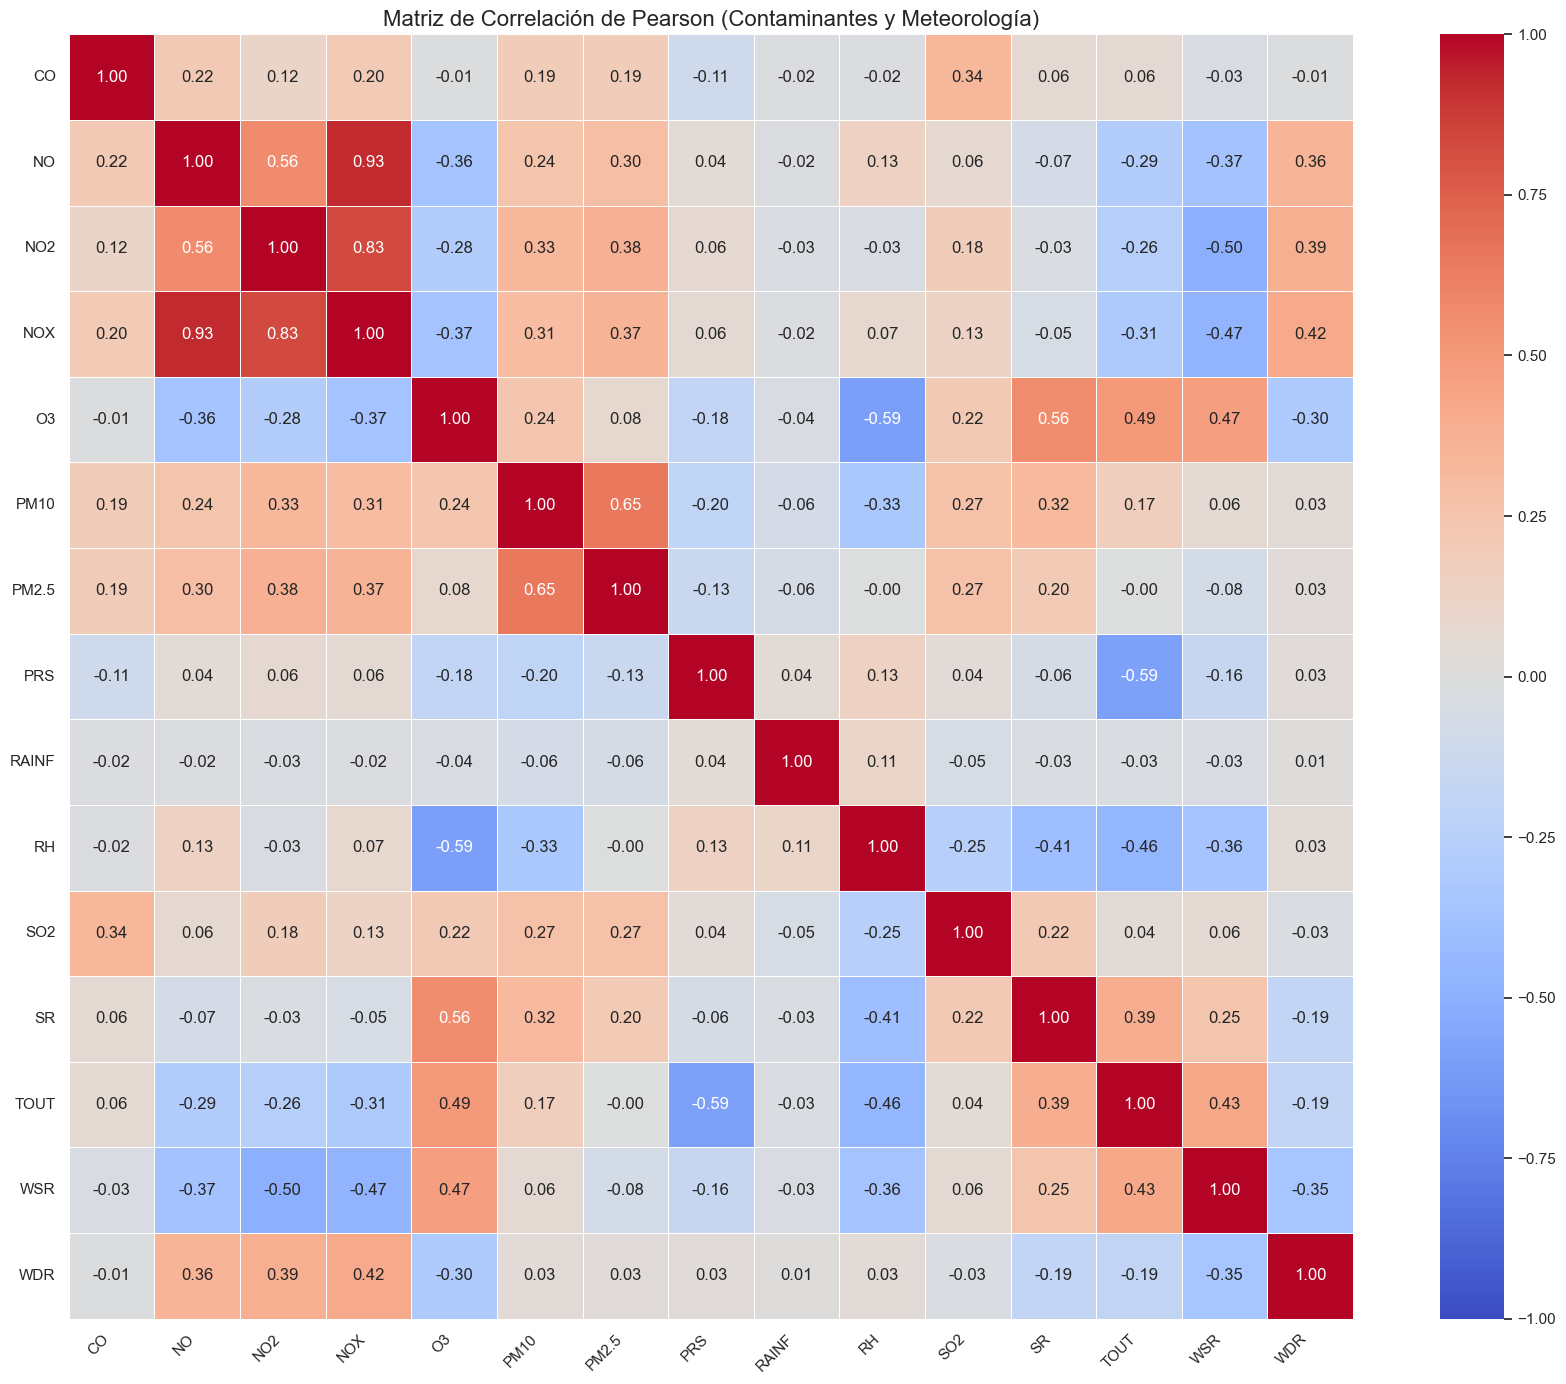

In [16]:
numeric_cols = df.select_dtypes(include=['float64']).columns

print("Calculando la matriz de correlación...")
corr_matrix = df[numeric_cols].corr(method='pearson')

print("Generando el heatmap...")
plt.figure(figsize=(18, 14)) # Tamaño amplio para 15x15 variables

sns.heatmap(
    corr_matrix, 
    annot=True,       # Mostrar los coeficientes
    fmt=".2f",        # Formato de 2 decimales
    cmap='coolwarm',  # Colormap divergente (azul-blanco-rojo)
    vmin=-1,          # Rango mínimo del color
    vmax=1,           # Rango máximo del color
    square=True,      # Forzar celdas cuadradas
    linewidths=.5     # Líneas ligeras entre celdas
)

plt.title('Matriz de Correlación de Pearson (Contaminantes y Meteorología)', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas X para legibilidad
plt.yticks(rotation=0) # Mantener etiquetas Y horizontales
plt.tight_layout() # Ajustar para que no se corten las etiquetas


print("\n--- Hallazgos Clave de Correlación ---")
print("\nCorrelaciones más fuertes con O3:")
print(corr_matrix['O3'].sort_values(ascending=False).head(5))

print("\nCorrelaciones más fuertes con PM2.5:")
print(corr_matrix['PM2.5'].sort_values(ascending=False).head(5))

print("\nCorrelaciones (Negativas) más fuertes con PM2.5 (Dispersión):")
print(corr_matrix['PM2.5'].sort_values(ascending=True).head(5))